In [9]:
### INITIALISATION ###

import numpy as np          # fundamental package for scientific computing
import glob                 # return all file paths that match a specific pattern
import os                   # to interact with the operating system
import matplotlib.pyplot as plt

files = glob.glob(os.path.expanduser('~/phase1_CONDA/timeseries/demeaned/*.npy'))
time = np.arange(1850,1850+3012/12,1/12)
time_annual = np.arange(1850,1850+3012/12)

In [10]:
3012/12

251.0

In [11]:
files

['/home/innag3580/phase1_CONDA/timeseries/demeaned/OSNAPeast_demeaned_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/demeaned/rapi_dens_demeaned_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/demeaned/OSNAPwest_demeaned_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/demeaned/spgy_dept_demeaned_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/demeaned/spgy_dens_demeaned_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/demeaned/rapi_dept_demeaned_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/demeaned/bsf_min_demeaned_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/demeaned/maxi_dept_demeaned_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/demeaned/maxi_dens_demeaned_series.npy']

In [12]:
def annual_from_monthly(signal):
    # Calculate the annual means by averaging the values in each row
    reshaped_data = signal.reshape(-1, 12)
    annual_means = np.mean(reshaped_data, axis=1)
    return annual_means

# Inspect max dens "time series 8" 

In [24]:
# Load your data
dens_max = np.load(files[-1])[:,8]
dens_max_annual = annual_from_monthly(dens_max)

dept_max = np.load(files[-2])[:,8]
dept_max_annual = annual_from_monthly(dept_max)

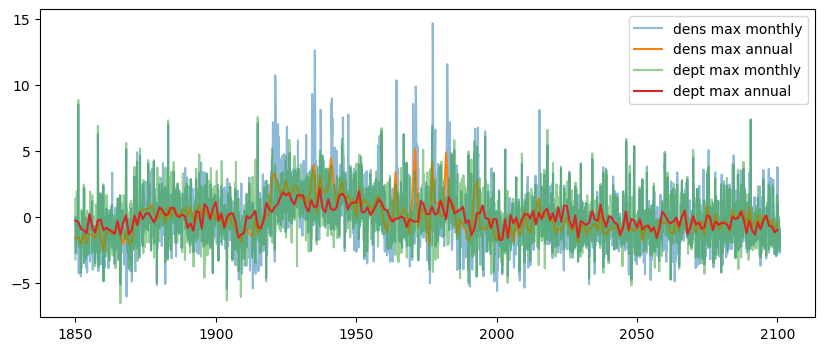

In [25]:
plt.figure(figsize=(10, 4))

plt.plot(time, dens_max, label='dens max monthly', alpha = 0.5)
plt.plot(time_annual, dens_max_annual, label='dens max annual')

plt.plot(time, dept_max, label='dept max monthly', alpha = 0.5)
plt.plot(time_annual, dept_max_annual, label='dept max annual')

plt.legend()
plt.show()